In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
import pandas_datareader.data as web

In [2]:
url= 'https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics'
tb=pd.read_html(url) 
tb[0].head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [3]:
fundraising=tb[0]


In [4]:
fundraising['REV'] = fundraising['Revenue'].str[2:]
fundraising['REV'] = fundraising['REV'].str.replace(",", "")
fundraising['REV'] = pd.to_numeric(fundraising['REV'])

In [5]:
fundraising.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets,REV
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532",154686521
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",162886686
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",129234327
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",120067266
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",104505783


In [6]:

fundraising['EXE'] = fundraising['Expenses'].str[2:]
fundraising['EXE'] = fundraising['EXE'].str.replace(",", "")
fundraising['EXE'] = pd.to_numeric(fundraising['EXE'])

In [7]:
fundraising.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets,REV,EXE
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532",154686521,145970915
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",162886686,111839819
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",129234327,112489397
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",120067266,91414010
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",104505783,81442265


In [8]:
fundraising['profit'] = fundraising['REV'] - fundraising['EXE']

In [9]:
fundraising = fundraising.drop(['Revenue', 'Expenses'], axis=1)

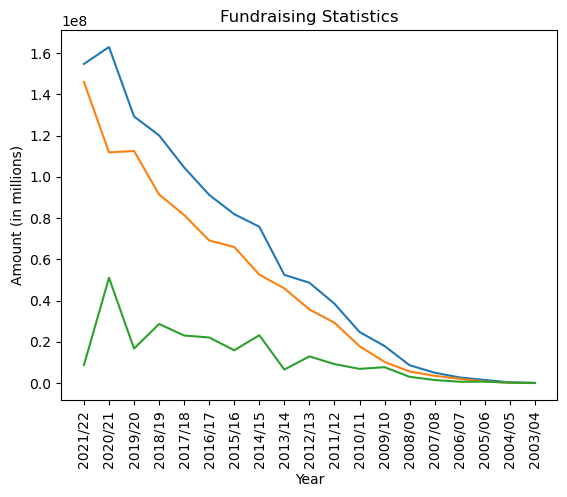

In [10]:
plt.plot(fundraising['Year'], fundraising['REV'], label='Revenue')
plt.plot(fundraising['Year'], fundraising['EXE'], label='Expenses')
plt.plot(fundraising['Year'], fundraising['profit'], label='Profit')
plt.title('Fundraising Statistics')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.xticks(rotation=90)
plt.show()

In [11]:
fundraising['rev_growth'] = fundraising['REV'].pct_change() * 100
fundraising['exe_growth'] = fundraising['EXE'].pct_change() * 100
fundraising = fundraising.iloc[1:]

In [12]:
print(fundraising[['Year', 'rev_growth', 'exe_growth']])

       Year  rev_growth  exe_growth
1   2020/21    5.301150  -23.382121
2   2019/20  -20.659981    0.580811
3   2018/19   -7.093364  -18.735443
4   2017/18  -12.960637  -10.908333
5   2016/17  -12.691513  -15.109485
6   2015/16  -10.279971   -4.613021
7   2014/15   -7.409356  -20.244422
8   2013/14  -30.782046  -12.730887
9   2012/13   -7.299834  -22.213036
10  2011/12  -20.881377  -18.048399
11  2010/11  -35.589117  -38.860576
12  2009/10  -27.459168  -42.610893
13  2008/09  -51.844620  -45.287336
14  2007/08  -41.869052  -36.966793
15  2006/07  -45.660256  -41.315872
16  2005/06  -44.859628  -61.888025
17  2004/05  -74.862189  -77.564285
18  2003/04  -78.862692  -86.794056


In [13]:
fundraising['profit_margin'] = fundraising['profit'] / fundraising['REV'] * 100
print(fundraising[['Year', 'profit_margin']])

       Year  profit_margin
1   2020/21      31.338882
2   2019/20      12.957030
3   2018/19      23.864336
4   2017/18      22.069131
5   2016/17      24.227394
6   2015/16      19.441399
7   2014/15      30.608563
8   2013/14      12.512163
9   2012/13      26.586827
10  2011/12      23.958143
11  2010/11      27.820345
12  2009/10      42.896630
13  2008/09      35.120904
14  2007/08      29.649566
15  2006/07      24.025150
16  2005/06      47.487631
17  2004/05      53.132254
18  2003/04      70.718466


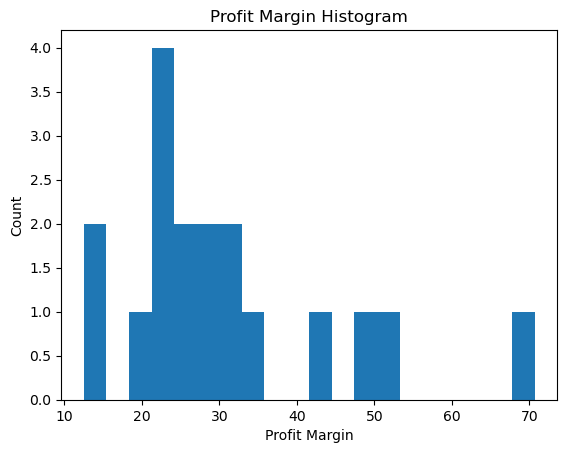

In [14]:
plt.hist(fundraising['profit_margin'], bins=20)
plt.title('Profit Margin Histogram')
plt.xlabel('Profit Margin')
plt.ylabel('Count')
plt.show()